In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

56.84606332287626 -73.07463142589636
33.20892011819738 67.58980585703696
-49.40426756353177 72.18689909117475
-77.09645225965124 6.369237942448791
-58.35871013508513 21.55844932870636
-56.66491919077589 -167.68714552708423
84.3770912239244 144.9158657701832
-48.42890115875941 -0.7378637949352083
-19.666493859928195 149.83091757090244
-35.11182290595716 -4.0393330812514705
14.712995721250337 -42.45984604308268
15.420273093913949 150.74405634039238
63.75814656435162 -83.38639419239465
4.119638776597469 -8.123958958410498
-25.32928350768617 -143.57847211031824
78.78663016742203 -73.7405414517368
77.10994675096072 64.54855327912924
-28.34038423358068 20.088180963692707
-1.0042172414860033 107.60228829789116
1.2370549521855736 -16.125003513433143
-83.42952670803695 -19.00129529255679
15.360237532802529 -89.92423926884548
43.55574608528565 -123.16820360656276
52.85140327590602 70.91884136630875
43.523157109127595 139.0115026863457
43.38600264363012 -147.8295919835611
-12.847740932755087 -152

In [10]:
from citipy import citipy

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | chapais
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | gazni
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | souillac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | bredasdorp
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | vaini
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | cape town
------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | deputatskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | narsaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | lukh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | moyale
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | qandala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | nanortalik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | muros
-----------------------------
Data Retrieval Complete      
-----------------------------


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | bengkulu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | katsuura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | abnub
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | hofn
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | port alfred
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | hauge
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | alice springs
-----------------------------
Data Retrieval Complete      
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | richards bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | cervo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | belmonte
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | yumen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | porto nacional
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | alta floresta
-----------------------------
Data Retrieval Complete      
---------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | changli
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | galgani
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | nichinan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | tabligbo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | saint-philippe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | saldanha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | hamilton
-----------------------------
Data Retrieval Complete   

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | rostovka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | swindon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | norman wells
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | lompoc
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | cerrito
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | marcona
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | luanda
-----------------------------
Data Retrieval Complete     

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | holme
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | olafsvik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | esperance
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | lappeenranta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | meulaboh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | la orilla
-----------------------------
Data Retrieval Complete      
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | la ronge
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | ossora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | marv dasht
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | laguna de perlas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | conyers
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | tumannyy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | kavaratti
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | namatanai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | raikot
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | aldan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | strezhevoy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | chimbote
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | vestmannaeyjar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | francofonte
-----------------------------
Data Retrieval Complete      
-------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | juazeiro do norte
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | hailun
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | khani
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | sinnamary
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | ca mau
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | siniscola
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | nurobod
-----------------------------
Data Retrieval Complete      
-------------

In [16]:
len(city_data)

0

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chapais,49.7834,-74.8492,2.98,94,100,7.94,CA,2022-12-27 04:15:36
1,Souillac,-20.5167,57.5167,77.38,78,75,9.22,MU,2022-12-27 04:15:37
2,Hermanus,-34.4187,19.2345,64.63,86,3,2.82,ZA,2022-12-27 04:15:37
3,Bredasdorp,-34.5322,20.0403,63.01,77,2,3.15,ZA,2022-12-27 04:15:38
4,Vaini,-21.2000,-175.2000,86.16,74,75,5.75,TO,2022-12-27 04:15:38
5,Chokurdakh,70.6333,147.9167,-24.75,98,100,4.81,RU,2022-12-27 04:15:39
6,Cape Town,-33.9258,18.4232,67.37,79,0,1.01,ZA,2022-12-27 04:10:58
7,Bowen,-20.0167,148.2333,82.54,65,77,20.15,AU,2022-12-27 04:15:40
8,Jamestown,42.0970,-79.2353,18.99,80,100,10.36,US,2022-12-27 04:13:05
9,Cayenne,4.9333,-52.3333,77.04,88,75,10.36,GF,2022-12-27 04:15:41


In [25]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [26]:
city_data_df = city_data_df[new_column_order]

In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

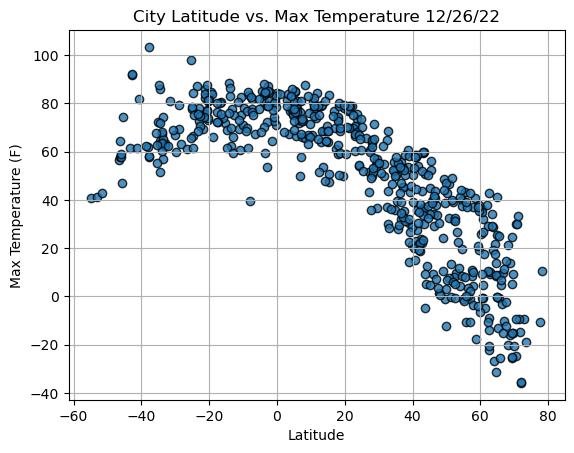

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

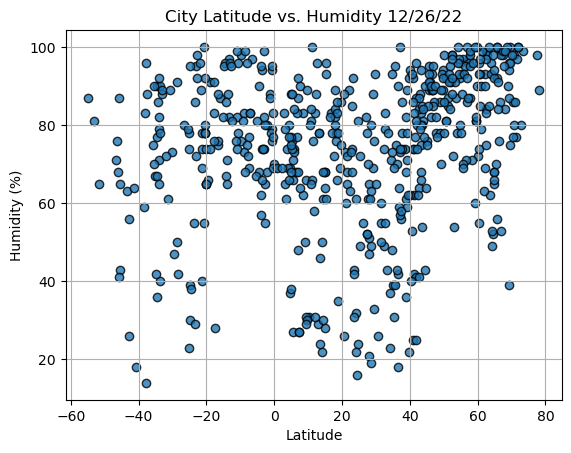

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

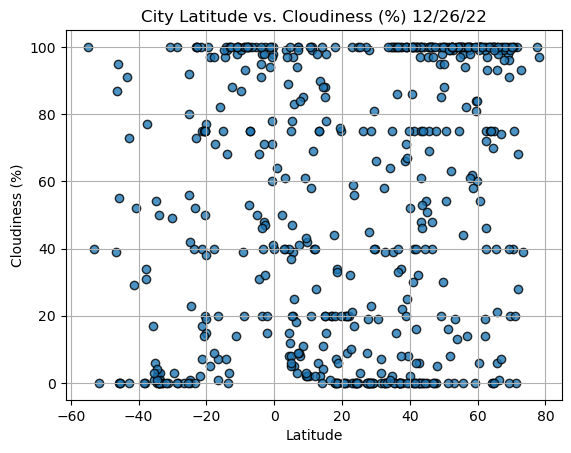

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

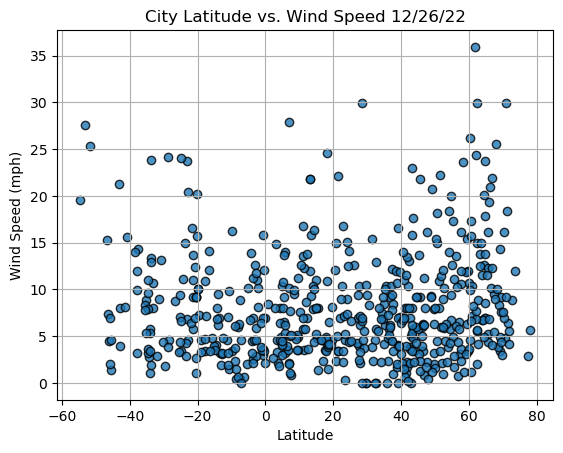

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13=city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-12-27 04:15:43
Lat                        77.484
Lng                      -69.3632
Max Temp                   -10.71
Humidity                       98
Cloudiness                    100
Wind Speed                   2.86
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chapais,CA,2022-12-27 04:15:36,49.7834,-74.8492,2.98,94,100,7.94
5,Chokurdakh,RU,2022-12-27 04:15:39,70.6333,147.9167,-24.75,98,100,4.81
8,Jamestown,US,2022-12-27 04:13:05,42.0970,-79.2353,18.99,80,100,10.36
9,Cayenne,GF,2022-12-27 04:15:41,4.9333,-52.3333,77.04,88,75,10.36
11,Harper,LR,2022-12-27 04:15:42,4.3750,-7.7169,77.05,80,8,7.99
...,...,...,...,...,...,...,...,...,...
550,El Playon,CO,2022-12-27 04:19:35,7.4713,-73.2031,73.67,64,84,5.10
551,Cody,US,2022-12-27 04:19:35,44.5263,-109.0565,50.22,43,0,9.22
552,Yayva,RU,2022-12-27 04:19:36,59.3303,57.2641,-3.87,100,100,3.04
553,Roald,NO,2022-12-27 04:19:36,62.5833,6.1333,42.75,75,40,29.93


In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chapais,CA,2022-12-27 04:15:36,49.7834,-74.8492,2.98,94,100,7.94
5,Chokurdakh,RU,2022-12-27 04:15:39,70.6333,147.9167,-24.75,98,100,4.81
8,Jamestown,US,2022-12-27 04:13:05,42.0970,-79.2353,18.99,80,100,10.36
9,Cayenne,GF,2022-12-27 04:15:41,4.9333,-52.3333,77.04,88,75,10.36
11,Harper,LR,2022-12-27 04:15:42,4.3750,-7.7169,77.05,80,8,7.99


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

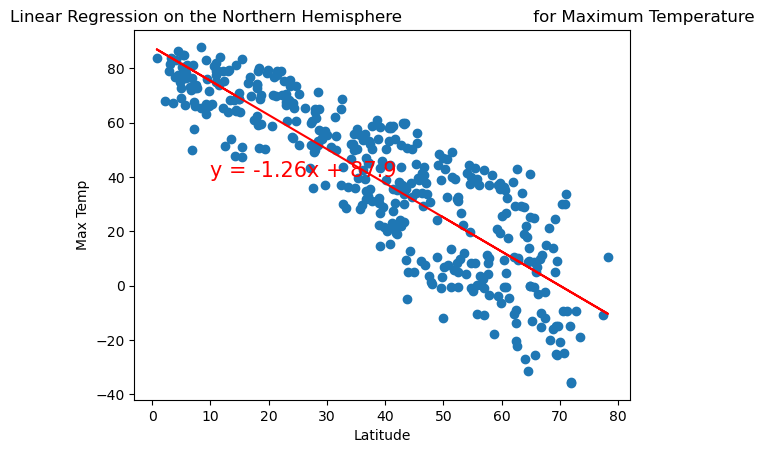

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

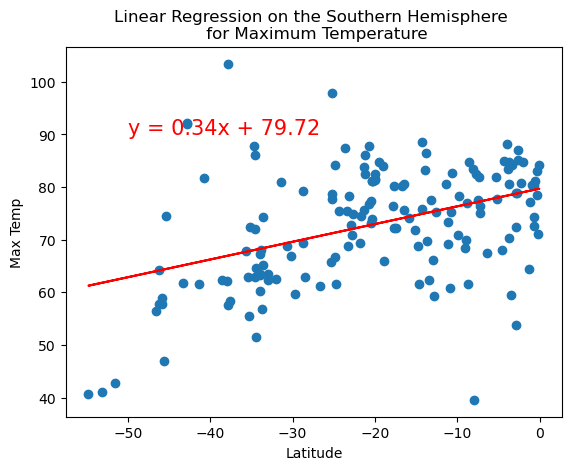

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

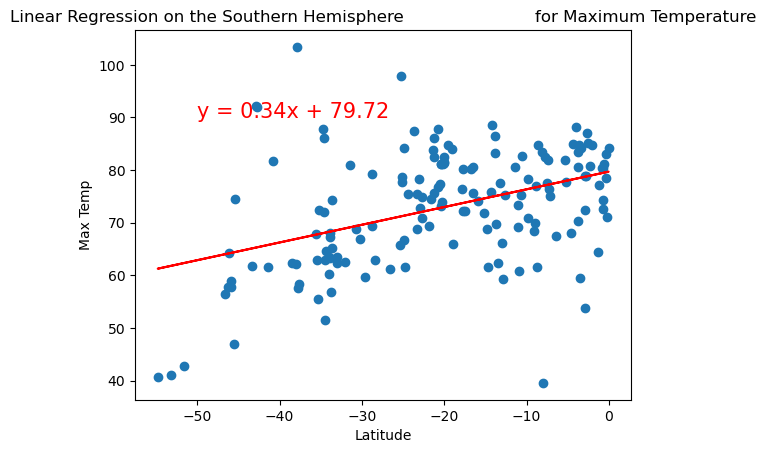

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

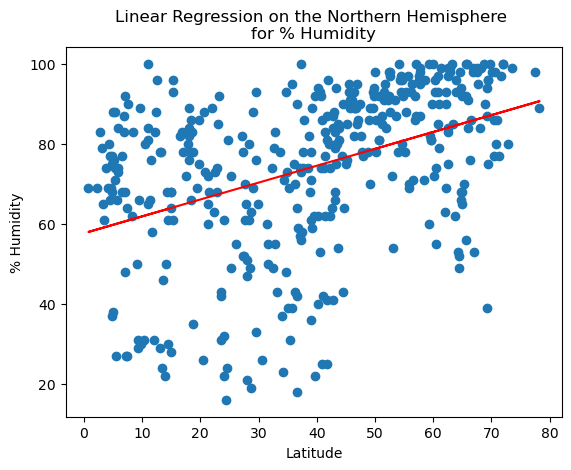

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

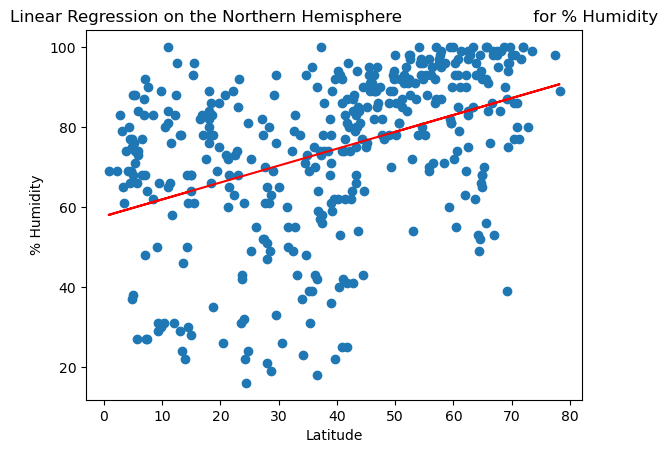

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

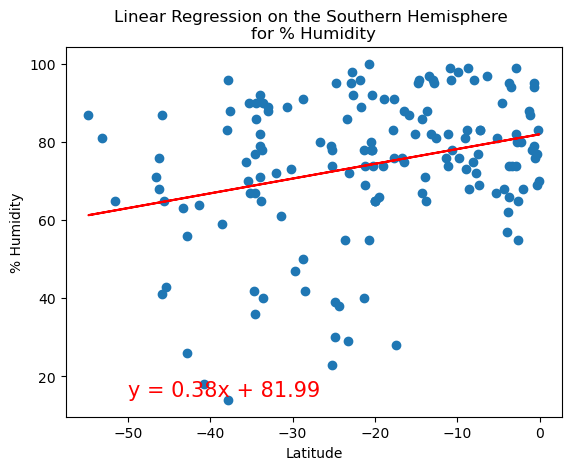

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

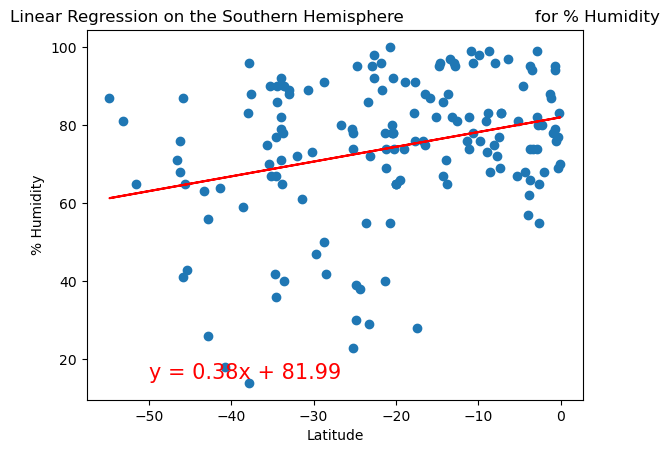

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

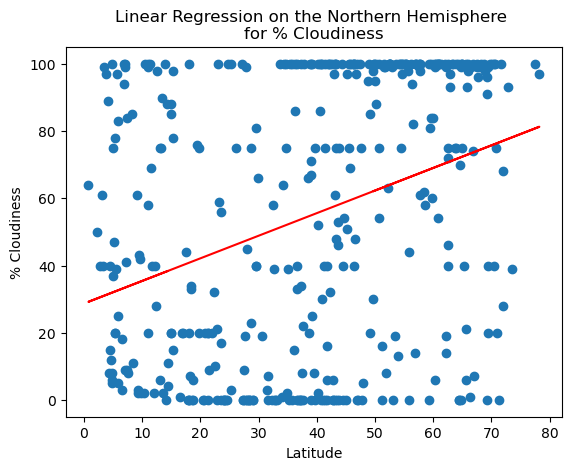

In [48]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

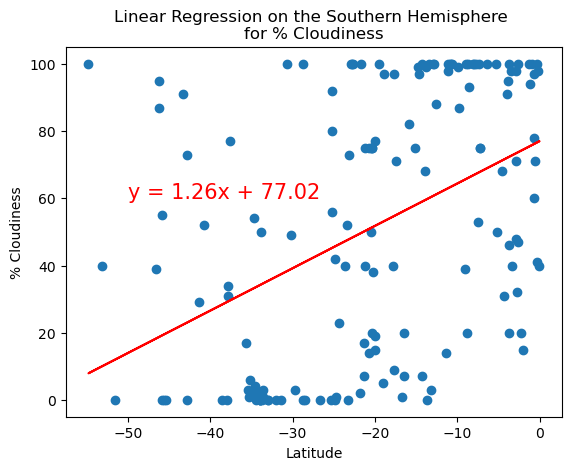

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

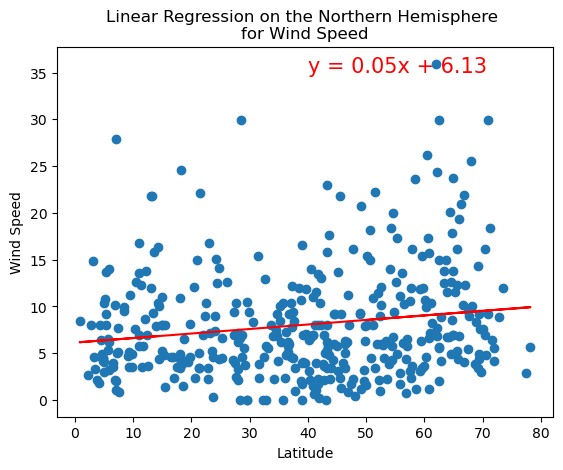

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

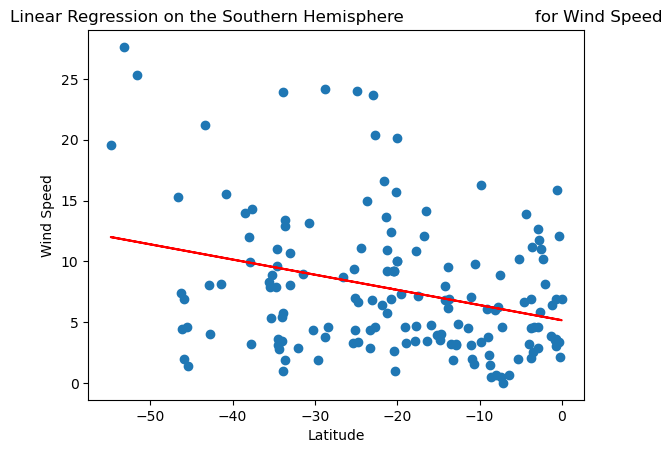

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))